##### 【問題1】断面図の作成

前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。
これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください

Text(96, [3435.59], 'you')

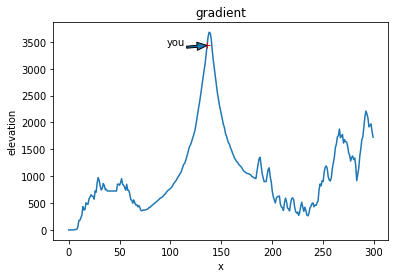

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

fuji_elevation = fuji[:,3:4]
#print(fuji_elevation)

plt.title('gradient')
plt.plot(fuji_elevation)
plt.xlabel('x')
plt.ylabel('elevation')
#plt.arrow()
marker_x = 136
plt.plot(marker_x, fuji_elevation[marker_x], color="Red", marker="+")
plt.annotate('you', xy=(marker_x, fuji_elevation[marker_x]), xytext=(marker_x-40, fuji_elevation[marker_x]+1), arrowprops=dict(shrink=0,width=2,headwidth=8,headlength=10))

In [2]:
print(fuji[6,3])

6.62


##### 【問題2】勾配の計算の関数
授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。
ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。
勾配は授業前課題で行ったように、以下の計算で求まります

input x, xy_list

function y = fuji[x]

output (y - (y-1)) / ((x - (x-1))

In [3]:
# calculation gradient from xy_list and variable_x
def calculate_gradient(x,xy_list):
    """
    x:x of csv_file
    y:elevation
    gradien:change amount of y / chane amount of x
    """
    if x!=0:
        y = xy_list[x,1]
        y_prev = xy_list[x-1,1]
        x_prev = x-1
        grad = (y-y_prev)/(x-x_prev)
        return grad
    else:
        print('x=0 out of range')
        return None

In [4]:
# if x=136
x=136
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
xy_list = np.delete(fuji,[1,2,4],axis=1)
print(xy_list)
print(calculate_gradient(x, xy_list))

[[   0.      0.  ]
 [   1.      0.  ]
 [   2.      0.  ]
 [   3.      0.  ]
 [   4.      0.  ]
 [   5.      0.  ]
 [   6.      6.62]
 [   7.      7.21]
 [   8.     12.2 ]
 [   9.     54.41]
 [  10.    171.56]
 [  11.    177.84]
 [  12.    228.21]
 [  13.    275.38]
 [  14.    433.76]
 [  15.    371.74]
 [  16.    380.06]
 [  17.    503.4 ]
 [  18.    485.39]
 [  19.    477.82]
 [  20.    580.5 ]
 [  21.    610.92]
 [  22.    654.96]
 [  23.    628.22]
 [  24.    626.64]
 [  25.    572.55]
 [  26.    723.95]
 [  27.    701.94]
 [  28.    879.47]
 [  29.    976.17]
 [  30.    919.16]
 [  31.    817.  ]
 [  32.    743.06]
 [  33.    770.92]
 [  34.    864.06]
 [  35.    826.52]
 [  36.    748.39]
 [  37.    756.11]
 [  38.    724.5 ]
 [  39.    724.5 ]
 [  40.    724.5 ]
 [  41.    724.5 ]
 [  42.    724.5 ]
 [  43.    724.5 ]
 [  44.    724.5 ]
 [  45.    724.5 ]
 [  46.    724.5 ]
 [  47.    724.5 ]
 [  48.    852.18]
 [  49.    851.36]
 [  50.    831.  ]
 [  51.    880.44]
 [  52.    9

##### 【問題3】勾配降下法の関数を作成
授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。
数式で表すと 「移動すべき地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。
この関数を使い、あなたが今いるxが136の地点（標高3434.59[m]）から、山を下っていきましょう。移動毎の標高はリストに記録し、その過程を可視化してください。断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。
実装上の注意
移動すべき地点は基本的には少数となりますが、勾配の情報は整数値の場所でしか得られません。そのため、四捨五入により整数値に変換する必要があります。
可視化のヒント
断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。
α
 の補足
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる 
α
 の値を見つけましょう。
初期値の補足
最初に居たx=136の地点のことを初期値と呼びます。この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

[[ 136.    168.35 3434.59]
 [ 119.     55.28 1561.94]
 [ 113.     53.28 1219.86]
 [ 108.     26.92 1000.24]
 [ 105.     26.61  910.5 ]
 [ 102.     22.37  817.62]
 [ 100.     18.9   772.58]
 [  98.     15.45  741.17]
 [  96.     27.79  700.15]
 [  93.     18.67  631.71]
 [  91.     13.37  602.36]
 [  90.     13.92  588.99]
 [  89.     21.43  575.07]
 [  87.     17.    536.54]
 [  85.     16.7   505.1 ]
 [  83.     13.16  471.82]
 [  82.     15.66  458.66]
 [  80.      2.19  420.6 ]]
(18, 3)


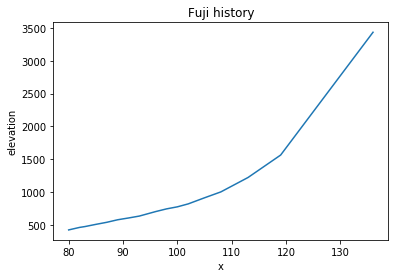

In [5]:
import math

ALPHA = 0.1
X_INIT = 136;

def cal_rounding(value):

    value_float, value_int = math.modf(value)
    if 0.5 <= value_float:
        value_int+=1 

    return int(value_int)
    
def cal_gradiant_descent(x_init, alpha, xy_list):
    """
    paramter
    ----------------
    x_init :
    alpha :
    
    return
    ----------------
    cal_history : list? or numpy array? (x, y_grad, y
    """
    nparray = np.array([[x_init, calculate_gradient(x_init, xy_list), xy_list[x_init,1]]])
    
    x = x_init
    while 0 < x:
        x_prev= x
        y_grad = calculate_gradient(x, xy_list)     
        #historyを作る
        tmp = np.array([[x, y_grad, xy_list[x,1]]])
        nparray = np.concatenate([nparray, tmp])
        
        #x更新
        #x = x - alpha* Decimal(np.round(x - y_grad*alpha)).quantize(Decimal('1'), rounding=ROUND_HALF_EVEN)
        #x = np.round(x - y_grad*alpha)
        x = cal_rounding( x-y_grad*alpha )
        #ループを抜ける条件 勾配が0 もしくはxの値が更新されなかったら
        if y_grad == 0 or x == x_prev:
            break
    nparray = np.delete(nparray,0,axis=0)
    print(nparray)
    print(nparray.shape)
    return nparray

#call function
history = cal_gradiant_descent(X_INIT, ALPHA, xy_list)

plt.title('Fuji history')
#plt.plot(fuji_elevation)
plt.xlabel('x')
plt.ylabel('elevation')
plt.plot(history[:,0:1], history[:,2:3])


# 課題4 pattern of x_init > 136

[[ 150.    -94.97 2146.01]
 [ 155.    -50.88 1748.11]
 [ 158.    -32.76 1590.97]
 [ 160.    -40.85 1484.72]
 [ 162.    -44.96 1384.07]
 [ 164.    -27.05 1306.46]
 [ 165.    -33.48 1272.98]
 [ 167.    -36.76 1222.48]
 [ 169.    -18.99 1182.32]
 [ 170.    -21.47 1160.85]
 [ 171.    -36.02 1124.83]
 [ 173.    -14.66 1081.07]
 [ 174.    -13.02 1068.05]
 [ 175.    -14.77 1053.28]
 [ 176.     -3.95 1049.33]]
(15, 3)


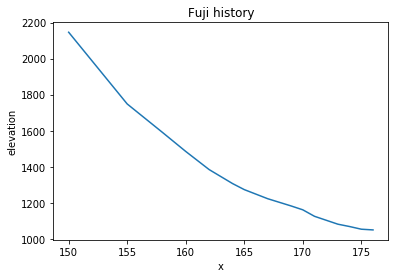

In [6]:
ALPHA = 0.05
X_INIT = 150
history = cal_gradiant_descent(X_INIT, ALPHA, xy_list)

plt.title('Fuji history')
#plt.plot(fuji_elevation)
plt.xlabel('x')
plt.ylabel('elevation')
plt.plot(history[:,0:1], history[:,2:3])


# 課題5 pattern of X{x1,x2,....,xn}

In [7]:
# calculation gradient expands array
def calculate_gradient_array(x, xy_list):
    """
    x:x[x1,x2,x3,..,xn]
    y:xy_list[x,1]
    grad:array of (change amount of y / chane amount of x)
    """ 
    if  np.any(x==0) !=True:
        x_prev = x-1
        y = xy_list[x,1]
        y_prev = xy_list[x-1,1]
        grad = (y-y_prev)/(x-x_prev+1e-8)
        return grad

fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
xy_list = np.delete(fuji,[1,2,4],axis=1)
x = np.arange(1,300)
print(calculate_gradient_array(x, xy_list))

[   0.            0.            0.            0.            0.
    6.61999993    0.58999999    4.98999995   42.20999958  117.14999883
    6.27999994   50.3699995    47.16999953  158.37999842  -62.01999938
    8.31999992  123.33999877  -18.00999982   -7.56999992  102.67999897
   30.4199997    44.03999956  -26.73999973   -1.57999998  -54.08999946
  151.39999849  -22.00999978  177.52999822   96.69999903  -57.00999943
 -102.15999898  -73.93999926   27.85999972   93.13999907  -37.53999962
  -78.12999922    7.71999992  -31.60999968    0.            0.
    0.            0.            0.            0.            0.
    0.            0.          127.67999872   -0.81999999  -20.3599998
   49.43999951   74.69999925 -105.61999894  -17.91999982  -41.58999958
  -51.03999949  109.8599989  -110.52999889   -1.81999998  -64.23999936
 -108.21999892  -11.78999988  -54.81999945   60.86999939  -55.25999945
  -40.68999959    7.32999993  -40.1699996    24.71999975  -41.93999958
  -49.9799995    -6.60999993   

[[ 831.    955.14  724.5   724.5   724.5   724.5   724.5   724.5   724.5
   724.5   724.5 ]
 [ 772.58  741.17  700.15  631.71  602.36  588.99  575.07  536.54  505.1
   471.82  458.66]
 [2146.01 1525.57 1259.24 1222.48 1124.83 1053.28 1049.33 1049.33 1049.33
  1049.33 1049.33]
 [ 723.66  354.39  563.7   312.76  332.39  563.7   312.76  332.39  563.7
   312.76  332.39]]
(4, 11)
[[ 831.    772.58 2146.01  723.66]
 [ 955.14  741.17 1525.57  354.39]
 [ 724.5   700.15 1259.24  563.7 ]
 [ 724.5   631.71 1222.48  312.76]
 [ 724.5   602.36 1124.83  332.39]
 [ 724.5   588.99 1053.28  563.7 ]
 [ 724.5   575.07 1049.33  312.76]
 [ 724.5   536.54 1049.33  332.39]
 [ 724.5   505.1  1049.33  563.7 ]
 [ 724.5   471.82 1049.33  312.76]
 [ 724.5   458.66 1049.33  332.39]]


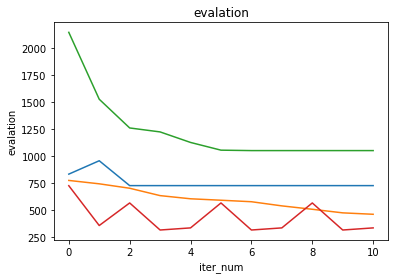

In [21]:
#import math
import matplotlib.pyplot as plt
%matplotlib inline

#ALPHA = 0.1
#X_INIT = np.arange(1,300)

#def cal_rounding(value):

    #value_float, value_int = math.modf(value)
    #if 0.5 <= value_float:
        #value_int+=1 

    #return int(value_int)
    
def cal_gradient_descent_array(x, alpha, xy_list,iter_num=10):
    """
    paramter
    ----------------
    x_init :
    alpha :
    
    return
    ----------------
    cal_history : list? or numpy array? (x, y_grad, y
    """
    y_array = fuji[x,3].reshape(len(x),1)
    for _ in range(iter_num):
        #if np.any(300<=x) != True:
           # break
        grad = calculate_gradient_array(x, xy_list)
        #print(grad)
        x = np.round(x - grad*alpha)
        x = x.astype(np.int64)
        y = xy_list[x,1]
        y = y.reshape(len(x), 1)
        y_array = np.concatenate((y_array, y),axis=1)
    return y_array
    
#call function
ALPHA = 0.1
X_INIT = np.array([50, 100, 150, 200])
iter_num = 10
#print(X_INIT.shape)
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
xy_list = np.delete(fuji,[1,2,4],axis=1)
print(cal_gradient_descent_array(X_INIT, ALPHA, xy_list, iter_num))
y = cal_gradient_descent_array(X_INIT, ALPHA, xy_list, iter_num)
print(y.shape)
plt.title('evalation')
plt.xlabel('iter_num')
plt.ylabel('evalation')

print(y.T)
plt.plot(y.T)
#plt.plot(y.T[:1])
plt.show()

# 課題6 alpha expands variable

In [9]:
x = np.array([100, 200])
iter_num = 150
alpha = np.linspace(0.01, 0.3, 31)
for i in range(alpha.shape[0]):
    x, y = cal_gradient_descent_array(x, alpha[i], xy_list, iter_num)
    print('alpha{}, x={}, y={}'.format(alpha[i], x, y))
    
# I can not graph this data.

alpha0.01, x=[772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58
 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 772.58 

IndexError: arrays used as indices must be of integer (or boolean) type

# 課題7

## 局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。

Please show the graph of task.5(titel'Convergence point') .
The point converging to 0 is only few point. 
At other points, we stop locally because there is little gradient.
It is called a local optimal solution.
If you want to improve the problem, adjust the hyperparator(Learning rate, for example).
Another solution is change input_data.